In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
## Reading the observational data: r1/2 and Re ======================

data_ufd = np.genfromtxt('D:/Research/ultra-faint dwarf galaxies/observational_data/r05_ufd.txt',dtype='str')
r05_ufd = np.array(data_ufd[:,2], dtype='float32')
sm_ufd = np.array(data_ufd[:,3], dtype='float32')
sm_ufd = sm_ufd * 1e6

data_dsph = np.genfromtxt('D:/Research/ultra-faint dwarf galaxies/observational_data/r05_dsph.txt',dtype='str')
r05_dsph = np.array(data_dsph[:,2], dtype='float32')
sm_dsph = np.array(data_dsph[:,3], dtype='float32')
sm_dsph = sm_dsph * 1e6

data_sim_2021 = np.genfromtxt('r_halfs.txt', dtype='str')
r05_ufd_sim_2021 = np.array(data_sim_2021[:,1], dtype='float32')
r05_ufd_sim_2021 = r05_ufd_sim_2021 * 1000 # converting kpc into pc
sm_ufd_sim_2021 = np.array(data_sim_2021[:,2], dtype='float32') # already in Msun

data_sim_2017 = np.genfromtxt('r_halfs_2017.txt', dtype='str')
r05_ufd_sim_2017 = np.array(data_sim_2017[:,1], dtype='float32')
r05_ufd_sim_2017 = r05_ufd_sim_2017 * 1000 # converting kpc into pc
sm_ufd_sim_2017 = np.array(data_sim_2017[:,2], dtype='float32') # already in Msun

# importing Hannah's data file
data_Hannah = np.genfromtxt('D:/Research/ultra-faint dwarf galaxies/Hannah_ObsData_May13_2022/ufdTreasuryInfo.txt',\
                            dtype='str')

r05_ufd_Hannah = np.array(data_Hannah[1:,12], dtype='float32') # unit: pc
r05_ufd_Hannah_up_error = np.array(data_Hannah[1:,13], dtype='float32')
r05_ufd_Hannah_down_error = np.array(data_Hannah[1:,14], dtype='float32')
#r05_ufd_Hannah_error = [r05_ufd_Hannah_up_error, r05_ufd_Hannah_down_error]

sigma_ufd_Hannah = np.array(data_Hannah[1:,16], dtype='float32') # unit: km/s
sigma_ufd_Hannah_up_error = np.array(data_Hannah[1:,17], dtype='float32')
sigma_ufd_Hannah_down_error = np.array(data_Hannah[1:,18], dtype='float32')
#sigma_ufd_Hannah_error = [sigma_ufd_Hannah_up_error, sigma_ufd_Hannah_down_error]

sm_ufd_Hannah = np.array(data_Hannah[1:,5], dtype='float32') # unit: Msun. assuming Kroupa IMF. if Salpeter IMF: idx = 8
sm_ufd_Hannah_up_error = np.array(data_Hannah[1:,6], dtype='float32')
sm_ufd_Hannah_down_error = np.array(data_Hannah[1:,7], dtype='float32')
#sm_ufd_Hannah_error = [sm_ufd_Hannah_up_error, sm_ufd_Hannah_down_error]

# removing all the unknown values in Hannah's data file
# first, check using the stellar mass array
r05_ufd_Hannah = r05_ufd_Hannah[sm_ufd_Hannah > 0]
r05_ufd_Hannah_up_error = r05_ufd_Hannah_up_error[sm_ufd_Hannah > 0]
r05_ufd_Hannah_down_error = r05_ufd_Hannah_down_error[sm_ufd_Hannah > 0]

sigma_ufd_Hannah = sigma_ufd_Hannah[sm_ufd_Hannah > 0]
sigma_ufd_Hannah_up_error = sigma_ufd_Hannah_up_error[sm_ufd_Hannah > 0]
sigma_ufd_Hannah_down_error = sigma_ufd_Hannah_down_error[sm_ufd_Hannah > 0]

sm_ufd_Hannah_up_error = sm_ufd_Hannah_up_error[sm_ufd_Hannah > 0]
sm_ufd_Hannah_down_error = sm_ufd_Hannah_down_error[sm_ufd_Hannah > 0]
sm_ufd_Hannah = sm_ufd_Hannah[sm_ufd_Hannah > 0]

# next, check using the velocity dispersion array
r05_ufd_Hannah = r05_ufd_Hannah[sigma_ufd_Hannah > 0]
r05_ufd_Hannah_up_error = r05_ufd_Hannah_up_error[sigma_ufd_Hannah > 0]
r05_ufd_Hannah_down_error = r05_ufd_Hannah_down_error[sigma_ufd_Hannah > 0]
r05_ufd_Hannah_error = [r05_ufd_Hannah_down_error, r05_ufd_Hannah_up_error]

sm_ufd_Hannah = sm_ufd_Hannah[sigma_ufd_Hannah > 0]
sm_ufd_Hannah_up_error = sm_ufd_Hannah_up_error[sigma_ufd_Hannah > 0]
sm_ufd_Hannah_down_error = sm_ufd_Hannah_down_error[sigma_ufd_Hannah > 0]
sm_ufd_Hannah_error = [sm_ufd_Hannah_down_error, sm_ufd_Hannah_up_error]

sigma_ufd_Hannah_up_error = sigma_ufd_Hannah_up_error[sigma_ufd_Hannah > 0]
sigma_ufd_Hannah_down_error = sigma_ufd_Hannah_down_error[sigma_ufd_Hannah > 0]
sigma_ufd_Hannah = sigma_ufd_Hannah[sigma_ufd_Hannah > 0]
sigma_ufd_Hannah_error = [sigma_ufd_Hannah_down_error, sigma_ufd_Hannah_up_error]

print(np.log10(sigma_ufd_Hannah))
print(np.log10(sigma_ufd_Hannah_up_error))
print(np.log10(sigma_ufd_Hannah_down_error))

[1.0211893  0.81954396 0.36921585 0.770852   1.0170333  0.30103
 0.6901961  1.0791812  0.73239374 0.968483   0.9777236  0.5185139
 0.23044893 0.59106463 0.41497332 0.8976271  0.6232493  0.9344985
 0.17609125 0.63346845 0.8692317  0.748188   0.63346845]
[ 0.8692317   0.07918126 -0.37675074  1.9777236   0.968483    1.9800034
  0.44715804  0.69897     0.47712126 -0.15490197  0.8325089  -0.15490197
 -0.30103    -0.09691001  1.9777236   0.11394334  1.9777236   0.6434527
  1.9800034   0.23044893  1.9242793   0.14612803  0.36172783]
[ 0.8692317   0.07918126 -0.5228787   1.9777236   0.7075702   1.9800034
 -0.0457575          nan  0.39794    -0.15490197  0.6434527  -0.15490197
 -0.30103    -0.09691001  1.9777236   0.11394334  1.9777236   0.43136376
  1.9800034   0.          1.9242793   0.14612803  0.11394334]


<ipython-input-2-c746032d8405>:74: RuntimeWarning: invalid value encountered in log10
  print(np.log10(sigma_ufd_Hannah_down_error))


In [3]:
sigma_vx_2021_1noRT = np.array(data_sim_2021[0, 3:], dtype='float32') # km/s
sigma_vx_2021_1RT = np.array(data_sim_2021[1, 3:], dtype='float32') # km/s
sigma_vx_2021_2noRT = np.array(data_sim_2021[2, 3:], dtype='float32') # km/s
sigma_vx_2021_2RT = np.array(data_sim_2021[3, 3:], dtype='float32') # km/s

sigma_vx_2017_h1 = np.array(data_sim_2017[0, 3:], dtype='float32') # km/s
sigma_vx_2017_h3 = np.array(data_sim_2017[1, 3:], dtype='float32') # km/s
sigma_vx_2017_h4 = np.array(data_sim_2017[2, 3:], dtype='float32') # km/s
sigma_vx_2017_h5 = np.array(data_sim_2017[3, 3:], dtype='float32') # km/s
sigma_vx_2017_h6 = np.array(data_sim_2017[4, 3:], dtype='float32') # km/s

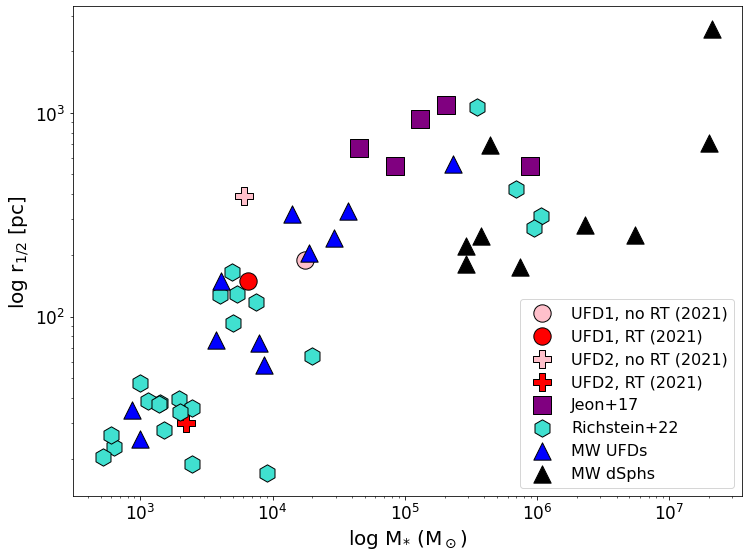

In [4]:
fig, ax = plt.subplots(figsize=[12, 9])

plt.scatter(sm_ufd_sim_2021[0], r05_ufd_sim_2021[0], marker='o', s=300, edgecolor='black', 
            color='pink', label='UFD1, no RT (2021)')
plt.scatter(sm_ufd_sim_2021[1], r05_ufd_sim_2021[1], marker='o', s=300, edgecolor='black', 
            color='red', label='UFD1, RT (2021)')
plt.scatter(sm_ufd_sim_2021[2], r05_ufd_sim_2021[2], marker='P', s=300, edgecolor='black', 
            color='pink', label='UFD2, no RT (2021)')
plt.scatter(sm_ufd_sim_2021[3], r05_ufd_sim_2021[3], marker='P', s=300, edgecolor='black', 
            color='red', label='UFD2, RT (2021)')

plt.scatter(sm_ufd_sim_2017, r05_ufd_sim_2017, marker='s', s=300, edgecolor='black', 
            color='purple', label='Jeon+17')
#plt.errorbar(sm_ufd_Hannah, r05_ufd_Hannah, xerr=sm_ufd_Hannah_error, yerr=r05_ufd_Hannah_error, \
#             fmt='o', marker='h', markersize=18, color='turquoise', mec='black', label='Richstein+22')
plt.scatter(sm_ufd_Hannah, r05_ufd_Hannah, marker='h', s=300, edgecolor='black', color='turquoise', label='Richstein+22')
plt.scatter(sm_ufd, r05_ufd, marker='^', s=300, edgecolor='black', 
            color='blue', label='MW UFDs')
plt.scatter(sm_dsph, r05_dsph, marker='^', s=300, edgecolor='black', 
            color='black', label='MW dSphs')

plt.legend(fontsize=16)
plt.xlabel('log M$_{*}$ (M$_\odot$)', fontsize=20)
plt.ylabel('log r$_{1/2}$ [pc]', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.yscale('log')
plt.xscale('log')

plt.savefig('logr12logMstar.png')

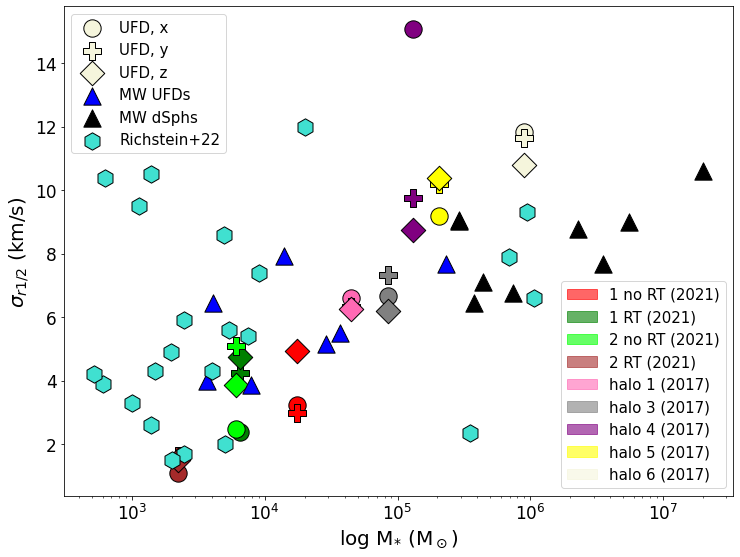

In [5]:
### Reading the observational data: dispersion for Re ======================

fig, ax = plt.subplots(figsize=[12, 9])

patch1 = mpatches.Patch(color='red', label='1 no RT (2021)', alpha=0.6)
patch2 = mpatches.Patch(color='green', label='1 RT (2021)', alpha=0.6)
patch3 = mpatches.Patch(color='lime', label='2 no RT (2021)', alpha=0.6)
patch4 = mpatches.Patch(color='brown', label='2 RT (2021)', alpha=0.6)

plt.scatter(sm_ufd_sim_2021[0], sigma_vx_2021_1noRT[0], s=300, marker='o', color='red', edgecolor='black')
plt.scatter(sm_ufd_sim_2021[0], sigma_vx_2021_1noRT[1], s=300, marker='P', color='red', edgecolor='black')
plt.scatter(sm_ufd_sim_2021[0], sigma_vx_2021_1noRT[2], s=300, marker='D', color='red', edgecolor='black')

plt.scatter(sm_ufd_sim_2021[1], sigma_vx_2021_1RT[0], s=300, marker='o', color='green', edgecolor='black')
plt.scatter(sm_ufd_sim_2021[1], sigma_vx_2021_1RT[1], s=300, marker='P', color='green', edgecolor='black')
plt.scatter(sm_ufd_sim_2021[1], sigma_vx_2021_1RT[2], s=300, marker='D', color='green', edgecolor='black')

plt.scatter(sm_ufd_sim_2021[2], sigma_vx_2021_2noRT[0], s=300, marker='o', color='lime', edgecolor='black')
plt.scatter(sm_ufd_sim_2021[2], sigma_vx_2021_2noRT[1], s=300, marker='P', color='lime', edgecolor='black')
plt.scatter(sm_ufd_sim_2021[2], sigma_vx_2021_2noRT[2], s=300, marker='D', color='lime', edgecolor='black')

plt.scatter(sm_ufd_sim_2021[3], sigma_vx_2021_2RT[0], s=300, marker='o', color='brown', edgecolor='black')
plt.scatter(sm_ufd_sim_2021[3], sigma_vx_2021_2RT[1], s=300, marker='P', color='brown', edgecolor='black')
plt.scatter(sm_ufd_sim_2021[3], sigma_vx_2021_2RT[2], s=300, marker='D', color='brown', edgecolor='black')

patch5 = mpatches.Patch(color='hotpink', label='halo 1 (2017)', alpha=0.6)
patch6 = mpatches.Patch(color='gray', label='halo 3 (2017)', alpha=0.6)
patch7 = mpatches.Patch(color='purple', label='halo 4 (2017)', alpha=0.6)
patch8 = mpatches.Patch(color='yellow', label='halo 5 (2017)', alpha=0.6)
patch9 = mpatches.Patch(color='beige', label='halo 6 (2017)', alpha=0.6)

plt.scatter(sm_ufd_sim_2017[0], sigma_vx_2017_h1[0], s=300, marker='o', color='hotpink', edgecolor='black')
plt.scatter(sm_ufd_sim_2017[0], sigma_vx_2017_h1[1], s=300, marker='P', color='hotpink', edgecolor='black')
plt.scatter(sm_ufd_sim_2017[0], sigma_vx_2017_h1[2], s=300, marker='D', color='hotpink', edgecolor='black')

plt.scatter(sm_ufd_sim_2017[1], sigma_vx_2017_h3[0], s=300, marker='o', color='gray', edgecolor='black')
plt.scatter(sm_ufd_sim_2017[1], sigma_vx_2017_h3[1], s=300, marker='P', color='gray', edgecolor='black')
plt.scatter(sm_ufd_sim_2017[1], sigma_vx_2017_h3[2], s=300, marker='D', color='gray', edgecolor='black')

plt.scatter(sm_ufd_sim_2017[2], sigma_vx_2017_h4[0], s=300, marker='o', color='purple', edgecolor='black')
plt.scatter(sm_ufd_sim_2017[2], sigma_vx_2017_h4[1], s=300, marker='P', color='purple', edgecolor='black')
plt.scatter(sm_ufd_sim_2017[2], sigma_vx_2017_h4[2], s=300, marker='D', color='purple', edgecolor='black')

plt.scatter(sm_ufd_sim_2017[3], sigma_vx_2017_h5[0], s=300, marker='o', color='yellow', edgecolor='black')
plt.scatter(sm_ufd_sim_2017[3], sigma_vx_2017_h5[1], s=300, marker='P', color='yellow', edgecolor='black')
plt.scatter(sm_ufd_sim_2017[3], sigma_vx_2017_h5[2], s=300, marker='D', color='yellow', edgecolor='black')

plt.scatter(sm_ufd_sim_2017[4], sigma_vx_2017_h6[0], s=300, marker='o', color='beige', \
            edgecolor='black', label='UFD, x')
plt.scatter(sm_ufd_sim_2017[4], sigma_vx_2017_h6[1], s=300, marker='P', color='beige', \
            edgecolor='black', label='UFD, y')
plt.scatter(sm_ufd_sim_2017[4], sigma_vx_2017_h6[2], s=300, marker='D', color='beige', \
            edgecolor='black', label='UFD, z')

m_UFD = [0.0037e6, 0.0041e6, 0.0079e6, 0.014e6, 0.029e6, 0.037e6, 0.23e6]
disp_UFD = [4.0, 6.46, 3.88, 7.93, 5.16, 5.49, 7.67]
m_dSph = [0.29e6, 0.29e6, 0.38e6, 0.44e6, 0.74e6, 2.3e6, 3.5e6, 5.5e6, 20e6]
disp_dSph = [9.05, 9.02, 6.44, 7.10, 6.76, 8.79, 7.68, 8.99, 10.59]
#plt.errorbar(sm_ufd_Hannah, sigma_ufd_Hannah, xerr=sm_ufd_Hannah_error, yerr=sigma_ufd_Hannah_error, \
#             fmt='o', marker='h', markersize=18, color='turquoise', mec='black', label='Richstein+22')
plt.scatter(m_UFD, disp_UFD, marker='^', s=300, edgecolor='black', color='blue', label='MW UFDs')
plt.scatter(m_dSph, disp_dSph, marker='^', s=300, edgecolor='black', color='black', label='MW dSphs')
plt.scatter(sm_ufd_Hannah, sigma_ufd_Hannah, marker='h', s=300, edgecolor='black', color='turquoise', label='Richstein+22')

legend1 = plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8, patch9], \
                     loc='lower right', fontsize=15)
legend2 = plt.legend(loc='upper left', fontsize=15)
plt.gca().add_artist(legend1)

plt.xlabel('log M$_{*}$ (M$_\odot$)', fontsize=20)
plt.ylabel('$\sigma_{r1/2}$ (km/s)', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xscale('log')

plt.savefig('logMstarsigmaRe.png')

In [6]:
print(np.size(r05_ufd))
print(np.size(disp_UFD))

11
7
